# TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database provides data on movies from the 1960's through 2015. Some of the information provided in this dataset includes titles, release dates, budgets and revenues (adjusted for inflation), actors, and genres for thousands of movie titles. 

My goal for this project is to establish a measure for a movie's performance in the boxoffice and use that measure to categorize the movies of the dataset as a flop, a hit, or a megahit. Then, I'll use other information contained in the dataset to determine if there are shared characteristics among the movies in these categories, as compared to the dataset as a whole. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import csv
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In the data wrangling phase, the first goal is to load the dataset into a pandas dataframe. Next, I will remove incomplete data and calculate a measure for box office performance (stored in a new column of the dataframe). This dataset stores information of the cast and genres of each movie in the same cell. I will separate the cast members or genres into individual rows for each movie, and store a limited amount of data from the dataset along with the cast or genre information in a new, separate dataset.   

### Loading the data

In [2]:
# Read data from csv file, create a file with partial data to start with (around 100 rows), and print the first few
# rows. 

#file_in  = 'tmdb_movies.csv'
#file_out = 'tmdb_movies_partial.csv'

#with open(file_out, 'w') as f_out, open(file_in, 'r', encoding = "ISO-8859-1") as f_in: 
#    in_reader = csv.reader(f_in)
#    out_writer = csv.writer(f_out)
#    while True:
#        datarow = next(in_reader)
        # Add about 100 rows to the partial data file - end the list at Paul Blart: Mall Cop 2
#        if datarow[5] == 'Paul Blart: Mall Cop 2':
#            break
#        out_writer.writerow(datarow)
        
#tmdb_movies_partial = pd.read_csv('tmdb_movies_partial.csv')

#display(tmdb_movies_partial.head())
#print(tmdb_movies_partial.shape)

In [3]:
#Read the entire csv file into pandas and print the first few rows.

tmdb_movies = pd.read_csv('tmdb_movies.csv', encoding = "ISO-8859-1")

#display(tmdb_movies.head())

In the first cell above, I read in the tmdb movies file and wrote a new pandas dataframe with only a small portion of the whole data set. This partial file was used to test ideas and code with a smaller working file. In the second cell, I read the entire dataset into a pandas dataframe. This was the file that was used for the final data analysis, and it is the file that will be used throughout the rest of the notebook.

### ROI as a measure of box office success

The main goal for this project is to determine a way to categorize the box office performance of a movie. To accomplish that, I'll use a very simple calculation of the return on investment (ROI): revenue (adjusted for inflation) / budget (adjusted for inflation)

In [4]:
#Take out rows with either zero revenues or zero budget

#tmdb_movies_partial = tmdb_movies_partial[tmdb_movies_partial.budget != 0]
#tmdb_movies_partial = tmdb_movies_partial[tmdb_movies_partial.revenue != 0]
tmdb_movies = tmdb_movies[tmdb_movies.budget != 0]
tmdb_movies = tmdb_movies[tmdb_movies.revenue != 0]

print(tmdb_movies.shape)

(3855, 21)


The dataset has incomplete data regarding budgets and revenues. Many entries are listed at 0 for either the budget or revenue, so those entries were removed in the cell above because the ROI calculation is not possible.

In [5]:
#Calculate the ROI (return on investment) of each movie - 
#Revenues adjusted for inflation / Budget adjusted for inflation

#tmdb_movies_partial['ROI'] = tmdb_movies_partial['revenue_adj'] / tmdb_movies_partial['budget_adj']
tmdb_movies['ROI'] = tmdb_movies['revenue_adj'] / tmdb_movies['budget_adj']
display(tmdb_movies.head())

    

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09,10.090192
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,2.522909
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08,2.683984
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09,10.340891
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09,7.927628


This cell calculates the ROI of each movie and stores it in a new column of the dataframe.

In [6]:
#Remove entries with budgets less than $10,000.

#tmdb_movies_partial = tmdb_movies_partial[tmdb_movies_partial.budget_adj > 10000]
tmdb_movies = tmdb_movies[tmdb_movies.budget_adj > 10000]
print(tmdb_movies.shape)

(3830, 22)


There are a handful of entries that seem to have incorrect budget entries - such as those with budgets listed as less than $10,000. This cell removes those entries.

In [7]:
#Categorize the entries based on ROI.

def flop_or_hit(roi):
    box_office = ''
    if roi < 1:
        box_office = 'Flop'
    elif 1 <= roi <= 10:
        box_office = 'Hit'
    else:
        box_office = 'Mega-hit'
    return box_office

#tmdb_movies_partial['box_office'] = tmdb_movies_partial['ROI'].apply(flop_or_hit)
tmdb_movies['box_office'] = tmdb_movies['ROI'].apply(flop_or_hit)
#display(tmdb_movies.head())

This cell adds a category for each film based on its ROI in a new column.

In [8]:
#Add column for decade

def find_decade(year):
    decade = ''
    if year > 1959 and year <= 1969:
        decade = '1960s'
    elif year > 1969 and year <= 1979:
        decade = '1970s'
    elif year > 1979 and year <= 1989:
        decade = '1980s'
    elif year > 1989 and year <= 1999:
        decade = '1990s'
    elif year > 1999 and year <= 2009:
        decade = '2000s'
    else:
        decade = '2010s'
    return decade

#tmdb_movies_partial['decade'] = tmdb_movies_partial['release_year'].apply(find_decade)
tmdb_movies['decade'] = tmdb_movies['release_year'].apply(find_decade)
#display(tmdb_movies.head())


This cell identifies the decade of each movie in the dataset and adds it to a new column.

### Separating cast and genre data

In the dataset, the cast, genre, and production company information is held within a single cell. In the data analysis, we might want to utilize this information and having it aggregated within a cell is less useful. In the following cells, I've separated the cast members and the genre types into individual rows and stored the separated data in a new dataframe.

In [9]:
tmdb_movies = tmdb_movies[tmdb_movies['cast'].notnull()]
tmdb_movies = tmdb_movies[tmdb_movies['genres'].notnull()]

In [10]:
def cast_split(df):

    new_columns = ['id','cast_member','original_title','ROI', 'box_office']
    new_cast_df = pd.DataFrame(columns=new_columns)
    for index, row in df.iterrows():
        cast_list = row['cast'].split('|')
        for cast_member in cast_list:
            new_row = row[new_columns]
            new_row['cast_member'] = cast_member
            new_cast_df = new_cast_df.append(new_row)
    return new_cast_df

tmdb_cast = cast_split(tmdb_movies)
display(tmdb_cast.head())

,id,cast_member,original_title,ROI,box_office
0,135397,Chris Pratt,Jurassic World,10.090192,Mega-hit
0,135397,Bryce Dallas Howard,Jurassic World,10.090192,Mega-hit
0,135397,Irrfan Khan,Jurassic World,10.090192,Mega-hit
0,135397,Vincent D'Onofrio,Jurassic World,10.090192,Mega-hit
0,135397,Nick Robinson,Jurassic World,10.090192,Mega-hit


In [11]:
def genre_split(df):
    new_columns = ['id','genre_type','original_title','ROI', 'box_office']
    new_genre_df = pd.DataFrame(columns=new_columns)
    for index, row in df.iterrows():
        genre_list = row['genres'].split('|')
        for genre_type in genre_list:
            new_row = row[new_columns]
            new_row['genre_type'] = genre_type
            new_genre_df = new_genre_df.append(new_row)
    return new_genre_df

tmdb_genre = genre_split(tmdb_movies)
display(tmdb_genre.head())

,id,genre_type,original_title,ROI,box_office
0,135397,Action,Jurassic World,10.090192,Mega-hit
0,135397,Adventure,Jurassic World,10.090192,Mega-hit
0,135397,Science Fiction,Jurassic World,10.090192,Mega-hit
0,135397,Thriller,Jurassic World,10.090192,Mega-hit
1,76341,Action,Mad Max: Fury Road,2.522909,Hit


These cells make new dataframes for the cast and genre data, separating the cast members and genre types into individual rows.

<a id='eda'></a>
## Exploratory Data Analysis

### Is there a relationship between a movie's budget and its revenues?

The first thing I wanted to determine was whether there was a simple relationship between budget and revenue. If there is an easily discernible relationship between budget and revenue, that information could be used to determine the necessary budget for a film's desired revenue outcome. 
 

r-squared: 0.323820703872


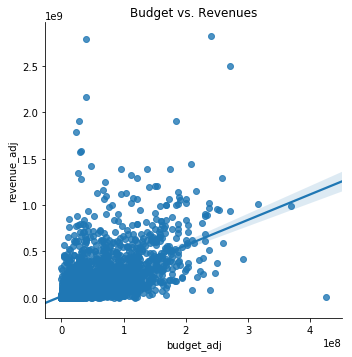

In [12]:
sns.lmplot('budget_adj', 'revenue_adj', data=tmdb_movies, fit_reg=True)
plt.title('Budget vs. Revenues')

x = tmdb_movies['budget_adj']
y = tmdb_movies['revenue_adj']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

Above is a scatter plot of budget vs revenue (adjusted for inflation). Unfortunately, there is not a clear relationship between budget and revenue. 


### Using ROI to group the data and make comparisons

Therefore, I used the return on investment (ROI) calculation to group the data and make comparisons. First, I defined a flop as a movie with an ROI less than one. These are films that did not break even financially. Second, movies with revenues exceeding 10 times the budget are rare - only ~8% of movies meet this qualification. I've defined these outliers as megahits. Finally, the rest of the films, with a ROI between 1 and 10, are defined as hits. They were profitable, but not outstandingly so.

In [13]:
tmdb_movies_minus_outliers = tmdb_movies[tmdb_movies.ROI < 10]
tmdb_movies_megahits = tmdb_movies[tmdb_movies.ROI > 10]
tmdb_movies_hits = tmdb_movies_minus_outliers[tmdb_movies_minus_outliers.ROI > 1]
tmdb_movies_flops = tmdb_movies[tmdb_movies.ROI < 1]

print(tmdb_movies_flops.shape, tmdb_movies_hits.shape, 
      tmdb_movies_megahits.shape, tmdb_movies.shape)



(1068, 24) (2460, 24) (295, 24) (3827, 24)


Flops: 1068/3827 = 28%
<br>
Hits: 2460/3827 = 64%
<br>
Megahits: 295/3827 = 8%

The majority of the data (92%) is either a flop or a hit, so I chose to visualize that data in a histogram.

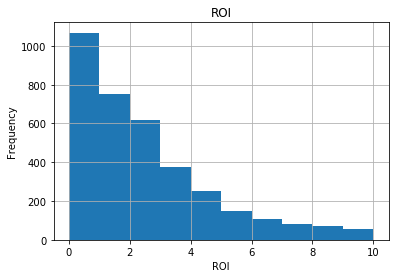

In [14]:
tmdb_histogram = tmdb_movies_minus_outliers.hist('ROI', bins=10)

for ax in tmdb_histogram.flatten():
    ax.set_xlabel('ROI')
    ax.set_ylabel('Frequency')

This histogram of the ROI data shows that the data is skewed right. 

In [15]:
#tmdb_movies.loc[tmdb_movies['decade'] == '1960s'].sort_values('ROI')
#tmdb_movies.loc[tmdb_movies['decade'] == '1970s'].sort_values('ROI')
#tmdb_movies.loc[tmdb_movies['decade'] == '1980s'].sort_values('ROI')
#tmdb_movies.loc[tmdb_movies['decade'] == '1990s'].sort_values('ROI')
#tmdb_movies.loc[tmdb_movies['decade'] == '2000s'].sort_values('ROI')
#tmdb_movies.loc[tmdb_movies['decade'] == '2010s'].sort_values('ROI')


Biggest flops by decade:
<br>
1960's - The Wild Bunch
<br>
1970's - Zabriske Point
<br>
1980's - Cherry 2000
<br>
1990's - The House of Spirits
<br>
2000's - Shattered Glass
<br>
2010's - The Samaritan
<br>

Biggest hits by decade:
<br>
1960's - Dr. No
<br>
1970's - Eraserhead
<br>
1980's - Friday the 13th
<br>
1990's - The Blair Witch Project
<br>
2000's - Paranormal Activity
<br>
2010's - The Gallows

I determined the films with the lowest and highest returns on investment for each decade. Interestingly, the biggest hits were almost entirely horror films. This information led me to determine if any genre of film, such as horror films, are more or less likely to be in the megahits category.

In [16]:
tmdb_genre_megahits = genre_split(tmdb_movies_megahits)
tmdb_genre_megahits_table = tmdb_genre_megahits.groupby(by='genre_type')['ROI'].describe().sort_values('count')
tmdb_genre_megahits_table['megahits percentage'] = (tmdb_genre_megahits_table['count']/295)*100


In [17]:
tmdb_genre_hits = genre_split(tmdb_movies_hits) 
tmdb_genre_hits_table = tmdb_genre_hits.groupby(by='genre_type')['ROI'].describe().sort_values('count')
tmdb_genre_hits_table['hits percentage'] = (tmdb_genre_hits_table['count']/2460)*100


In [18]:
tmdb_genre_flops = genre_split(tmdb_movies_flops)
tmdb_genre_flops_table = tmdb_genre_flops.groupby(by='genre_type')['ROI'].describe().sort_values('count')
tmdb_genre_flops_table['flops percentage'] = (tmdb_genre_flops_table['count']/1068)*100


In [19]:
tmdb_genre.groupby(by='genre_type')['ROI'].describe().sort_values('mean')
tmdb_genre_table = tmdb_genre.groupby(by='genre_type')['ROI'].describe().sort_values('count')
tmdb_genre_table['overall percentage'] = (tmdb_genre_table['count']/3827)*100


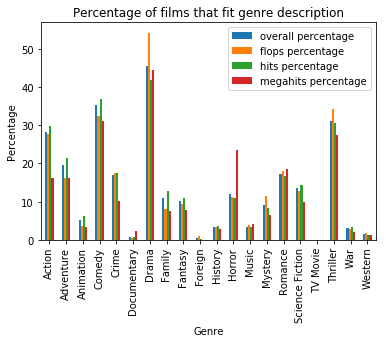

In [20]:
genre_percentages = pd.concat([tmdb_genre_table['overall percentage'], tmdb_genre_flops_table['flops percentage'], 
          tmdb_genre_hits_table['hits percentage'], tmdb_genre_megahits_table['megahits percentage']], axis=1)

genre_percentages_graph = genre_percentages.plot.bar(title='Percentage of films that fit genre description')
genre_percentages_graph.set_xlabel('Genre')
genre_percentages_graph.set_ylabel('Percentage')


In the cells above, the data in each box office category (flops, hits, or megahits) was grouped based on the type of genre that could be used to describe the film. Then a percentage of films that could be described in each genre was determined: number of films of genre / total number of films in the category. Note: the percentages add up to greater than 100% because any individual film can be described by more than one genre type. 

The graph above shows the comparison of percentages of movies that can be described by each genre type, in each category and overall. Romance films, for example, have very similar percentages across all categories. As noted above, horror films seem to be overrepresented in the megahits category - a higher percentage of films in the megahits category can be described as horror movies. Dramas appear to be somewhat overrepresented in the flops category, although across all categories, drama is the most common descriptor.



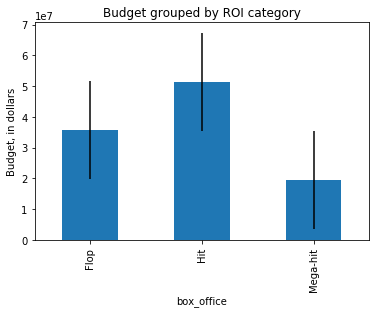

box_office
Flop        3.581653e+07
Hit         5.136035e+07
Mega-hit    1.937741e+07
Name: budget_adj, dtype: float64


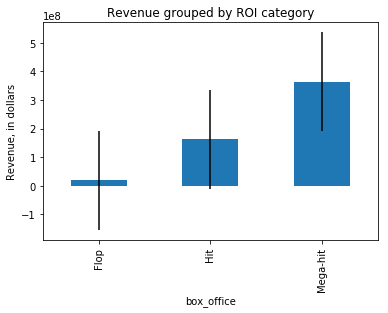

box_office
Flop        1.857187e+07
Hit         1.627070e+08
Mega-hit    3.634733e+08
Name: revenue_adj, dtype: float64


In [26]:
budget_data = tmdb_movies.groupby(by='box_office')['budget_adj'].mean()
budget_std = budget_data.std()
budget_graph = budget_data.plot.bar(y='mean', yerr=budget_std)

plt.title('Budget grouped by ROI category')
plt.ylabel('Budget, in dollars')
plt.show()
print(budget_data)

revenue_data = tmdb_movies.groupby(by='box_office')['revenue_adj'].mean()
revenue_std = revenue_data.std()
revenue_graph = revenue_data.plot.bar(y='mean', yerr=revenue_std)

plt.title('Revenue grouped by ROI category')
plt.ylabel('Revenue, in dollars')
plt.show()
print(revenue_data)

In the graphs above, the budgets and revenues of each box office category were compared to each other. Although the proper statistical analysis has not been performed, the data suggests that, unsurprisingly, movies with higher ROI had higher revenues. Interestingly, movies in the megahit category seem to have smaller budgets than the other categories. 

<a id='conclusions'></a>
## Conclusions

The data from the TMDb dataset suggests a few interesting conclusions. Although a full statistical analysis would give more information, this limited analysis suggests that there is not really a clear relationship between a film's budget and potential revenues. The histogram of the ROI data skews right, suggesting that the higher the ROI, the less likely it is to occur. Finally, the graphs of the films grouped by genre and the graphs of the budgets by category suggest that the highest ROI as a film maker is likely to occur by producing a low budget horror film that becomes widely successful. 

There are a couple of limitations for the data set. First, the data does not extend to films produced before 1960. It would be interesting to see trends in Hollywood over different eras of filmmaking. Additionally, The data suggests that low budget horror movies that gain a wide distribution are the ones most likely to have the best return on investment, but the data set probably does not provide information on independent films or films that don't gain a wide release, particularly for films before the 1980's. Therefore, it is hard to make conclusions on the likelihood of a low budget megahit (because the data may not be complete for similar low budget films). 

In the future, it would be interesting to explore a statistical model of risk assessment for producing films. For example, what is the probability of a movie at least breaking even financially (a hit, in this analysis), given a certain budget? This information could be useful for movies studios and producers choosing projects and budgets.

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDb_project.ipynb'])

0